# Know Your Metrics

Our *North Star* metric here will be **Monthly Revenue**

In [55]:
from __future__ import division # think this makes python use '/' as division?
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# pull in the dataset

tx_data = pd.read_csv('OnlineRetail.csv', encoding="cp1252")

tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


With this data, we can build our North Star metric:

In [16]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [56]:
#convert the type of Invoice Date to datetime
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [57]:
#create the YearMonth field
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [58]:
#another method to do the above
tx_data['InvoiceMonth'] = tx_data['InvoiceDate'].values.astype('datetime64[M]')

In [59]:
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,201012,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,201012,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,201012,2010-12-01


In [60]:
# let's calculate Revenue for each row, and then create another df with the monthly Rev
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']
tx_revenue = tx_data.groupby(['InvoiceMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceMonth,Revenue
0,2010-12-01,748957.020
1,2011-01-01,560000.260
2,2011-02-01,498062.650
3,2011-03-01,683267.080
4,2011-04-01,493207.121
5,2011-05-01,723333.510
6,2011-06-01,691123.120
7,2011-07-01,681300.111
8,2011-08-01,682680.510
9,2011-09-01,1019687.622


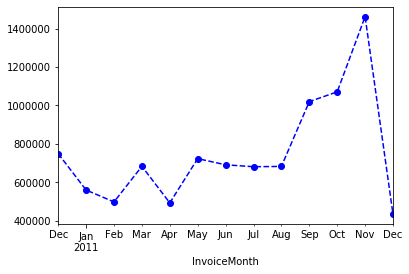

In [61]:
plot_data = tx_revenue.plot('InvoiceMonth', 'Revenue', color='b', marker='o', linestyle='dashed', legend = False)
plot_data

In [62]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue

,InvoiceMonth,Revenue,MonthlyGrowth
0,2010-12-01,748957.020,NaN
1,2011-01-01,560000.260,-0.252293
2,2011-02-01,498062.650,-0.110603
3,2011-03-01,683267.080,0.371850
4,2011-04-01,493207.121,-0.278163
5,2011-05-01,723333.510,0.466592
6,2011-06-01,691123.120,-0.044530
7,2011-07-01,681300.111,-0.014213
8,2011-08-01,682680.510,0.002026
9,2011-09-01,1019687.622,0.493653


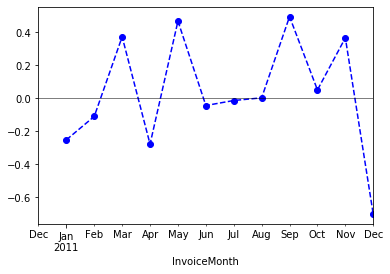

In [63]:
tx_revenue.plot('InvoiceMonth', 'MonthlyGrowth', color='b', marker='o', linestyle='dashed', legend = False)
plt.axhline(linewidth=.5, color='k')

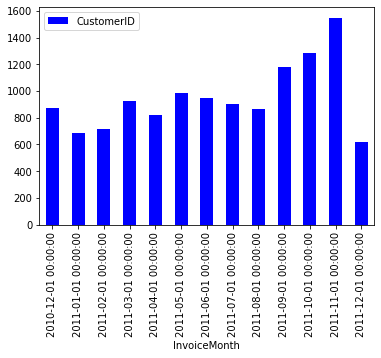

In [70]:
# Work out the monthly acrive customers - in the UK only
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True) # drops the existing index

tx_monthly_active = tx_uk.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()

tx_monthly_active

tx_monthly_active.plot.bar('InvoiceMonth', 'CustomerID', color='b')

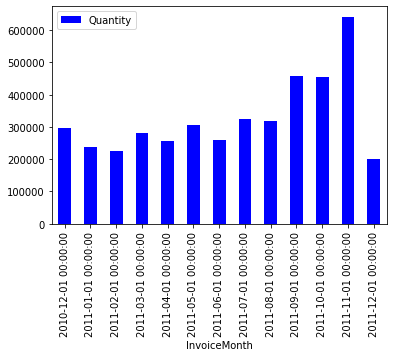

In [73]:
#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = tx_uk.groupby('InvoiceMonth')['Quantity'].sum().reset_index()

#print the dataframe
tx_monthly_sales

tx_monthly_sales.plot.bar('InvoiceMonth', 'Quantity', color='b')

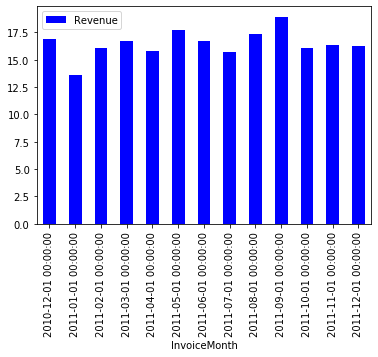

In [76]:
# calculating average transaction values each month
tx_monthly_order_avg = tx_uk.groupby('InvoiceMonth')['Revenue'].mean().reset_index()
tx_monthly_order_avg

# graph it!
tx_monthly_order_avg.plot.bar('InvoiceMonth', 'Revenue', color='b')